<a href="https://colab.research.google.com/github/rohanguptha/Projects/blob/master/Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv("Telecom Churn.csv")

In [0]:
Model_compare=[]

In [3]:
df.head()

State  Account length  ...  Customer service calls  Churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 20 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [0]:
df.drop_duplicates(keep='first', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [0]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
#display(prof)

In [0]:
#prof.to_file(outputfile='Report.html')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


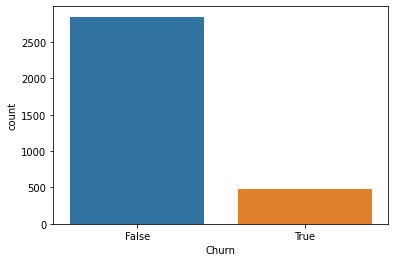

In [7]:
import seaborn as sns
ax = sns.countplot(x="Churn",data=df)

In [8]:
df.describe(include='all')

State  Account length  ...  Customer service calls  Churn
count   3333     3333.000000  ...             3333.000000   3333
unique    51             NaN  ...                     NaN      2
top       WV             NaN  ...                     NaN  False
freq     106             NaN  ...                     NaN   2850
mean     NaN      101.064806  ...                1.562856    NaN
std      NaN       39.822106  ...                1.315491    NaN
min      NaN        1.000000  ...                0.000000    NaN
25%      NaN       74.000000  ...                1.000000    NaN
50%      NaN      101.000000  ...                1.000000    NaN
75%      NaN      127.000000  ...                2.000000    NaN
max      NaN      243.000000  ...                9.000000    NaN

[11 rows x 20 columns]

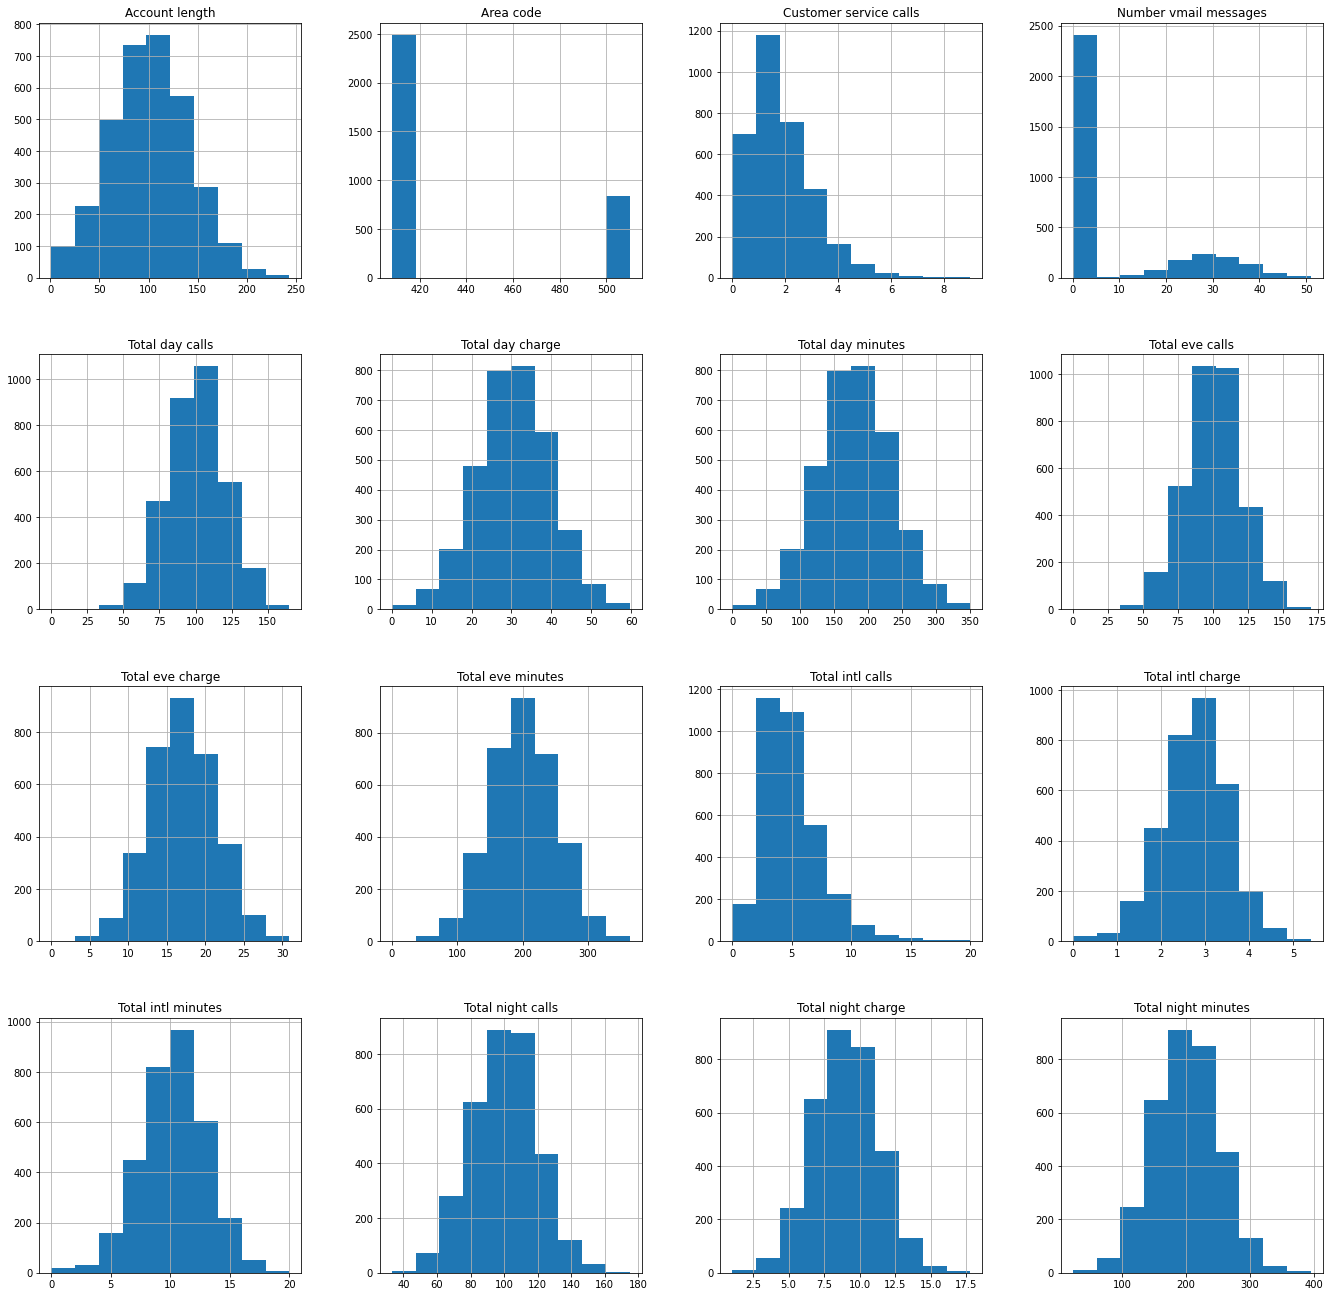

In [9]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
import matplotlib.pyplot as plt
numerical_df.hist(figsize=(23, 23))
plt.show()

In [10]:
df.skew(axis=0, numeric_only=True)

Account length            0.096606
Area code                 1.126823
Number vmail messages     1.264824
Total day minutes        -0.029077
Total day calls          -0.111787
Total day charge         -0.029083
Total eve minutes        -0.023877
Total eve calls          -0.055563
Total eve charge         -0.023858
Total night minutes       0.008921
Total night calls         0.032500
Total night charge        0.008886
Total intl minutes       -0.245136
Total intl calls          1.321478
Total intl charge        -0.245287
Customer service calls    1.091359
Churn                     2.018356
dtype: float64

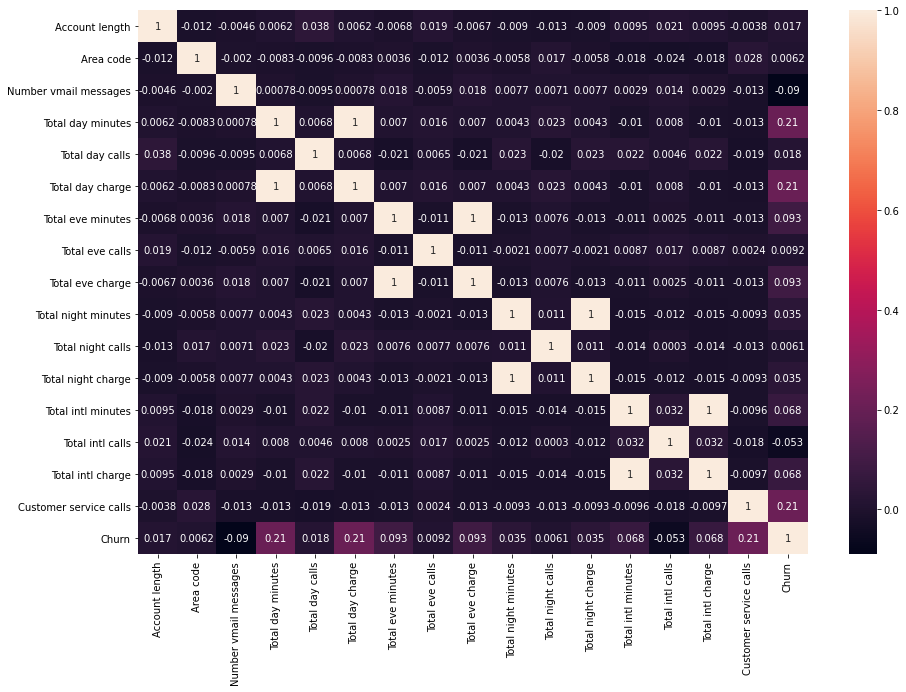

In [11]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrMatrix, annot=True)

In [12]:
cplot = df[(df['Churn'] == False)]
cplot = cplot.groupby('State', as_index=False).count()
cplot[['State', 'Churn']].head(10)

State  Churn
0    AK     49
1    AL     72
2    AR     44
3    AZ     60
4    CA     25
5    CO     57
6    CT     62
7    DC     49
8    DE     52
9    FL     55

In [13]:
cplot['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [14]:
import folium
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
bins = list(cplot['Churn'].quantile([0, 0.25, 0.5, 0.75, 1]))
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

folium.Choropleth(
    geo_data=state_geo,
    data=cplot,
    columns=['State', 'Churn'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Telecom Churn',
    bins=bins,
    reset=True
).add_to(m)
folium.LayerControl().add_to(m)
m

In [0]:
df.Churn = df.Churn.astype(int)
df['International plan'] = df['International plan'].replace({'No': 0, 'Yes': 1})
df['Voice mail plan'] = df['Voice mail plan'].replace({'No': 0, 'Yes': 1})

In [0]:
model_data = df[['Account length', 'International plan',
       'Voice mail plan', 'Total day calls', 'Total day charge',
       'Total eve calls', 'Total eve charge', 
       'Total night calls', 'Total night charge',
       'Total intl calls', 'Total intl charge', 
       'Customer service calls', 'Churn']]

In [18]:
model_data.head()

Account length  International plan  ...  Customer service calls  Churn
0             128                   0  ...                       1      0
1             107                   0  ...                       1      0
2             137                   0  ...                       0      0
3              84                   1  ...                       2      0
4              75                   1  ...                       3      0

[5 rows x 13 columns]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data.drop('Churn',axis=1), 
           model_data['Churn'], test_size=0.20, 
           random_state=101)

# **Logistic Regression:**

In [20]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#predictions
y_pred = logmodel.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       573
           1       0.43      0.17      0.24        94

    accuracy                           0.85       667
   macro avg       0.65      0.57      0.58       667
weighted avg       0.81      0.85      0.82       667



In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[552  21]
 [ 78  16]]


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1_score=f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score", f1_score)
Model_compare.append(('Logistic Regression', accuracy, precision, recall, f1_score))

Accuracy: 0.8515742128935532
Precision: 0.43243243243243246
Recall: 0.1702127659574468
F1 Score 0.24427480916030533


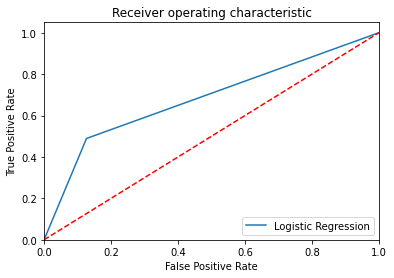

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(logmodel.predict(X_train), y_train, drop_intermediate=False)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **K-Nearest Neighbor**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
kNN_Model = KNeighborsClassifier()
kNN_Model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
y_pred = kNN_Model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       573
           1       0.86      0.46      0.60        94

    accuracy                           0.91       667
   macro avg       0.89      0.72      0.77       667
weighted avg       0.91      0.91      0.90       667



In [0]:
import numpy as np
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

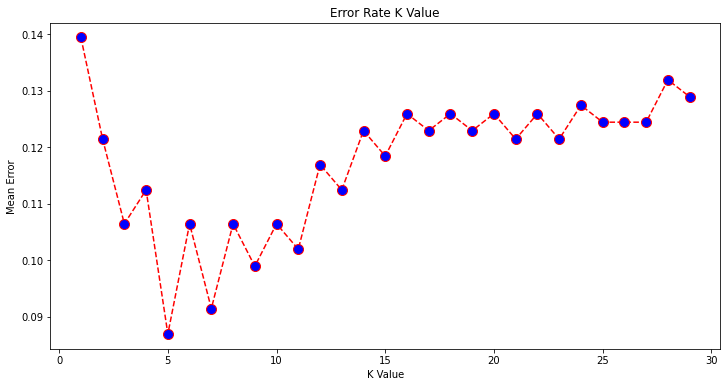

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [40]:
from sklearn.neighbors import KNeighborsClassifier
kNN_Model = KNeighborsClassifier(n_neighbors=5)
kNN_Model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = kNN_Model.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))
Model_compare.append(('KNN', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       573
           1       0.86      0.46      0.60        94

    accuracy                           0.91       667
   macro avg       0.89      0.72      0.77       667
weighted avg       0.91      0.91      0.90       667



# **Decision Trees:**

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [45]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

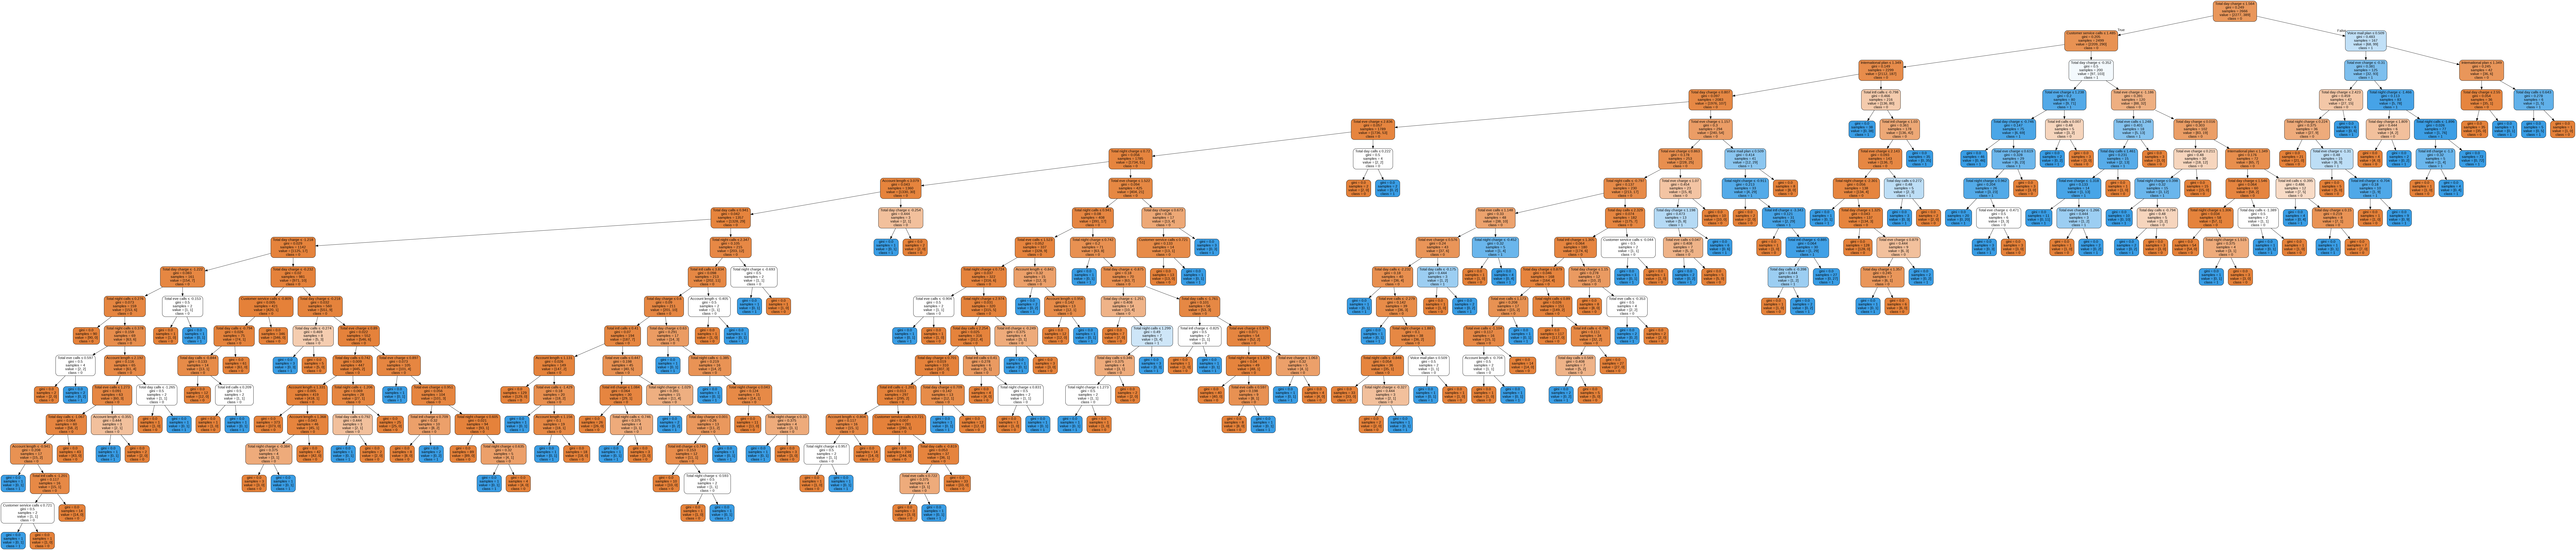

In [46]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = model_data.drop('Churn',axis=1).columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [0]:
y_pred = dtree.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       573
           1       0.68      0.74      0.71        94

    accuracy                           0.91       667
   macro avg       0.82      0.84      0.83       667
weighted avg       0.92      0.91      0.92       667



In [49]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9145427286356822


**Optimizing Decision Tree Performance**

In [50]:
import numpy as np
error = []
for i in range(1, 15):
    DecisionTree_Model = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    DecisionTree_Model.fit(X_train, y_train)
    pred_i = DecisionTree_Model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

print(error)

[0.12293853073463268, 0.11094452773613193, 0.095952023988006, 0.06896551724137931, 0.06446776611694154, 0.05247376311844078, 0.05247376311844078, 0.05247376311844078, 0.05697151424287856, 0.05547226386806597, 0.06446776611694154, 0.07796101949025487, 0.06746626686656672, 0.07796101949025487]


Text(0, 0.5, 'Mean Error')

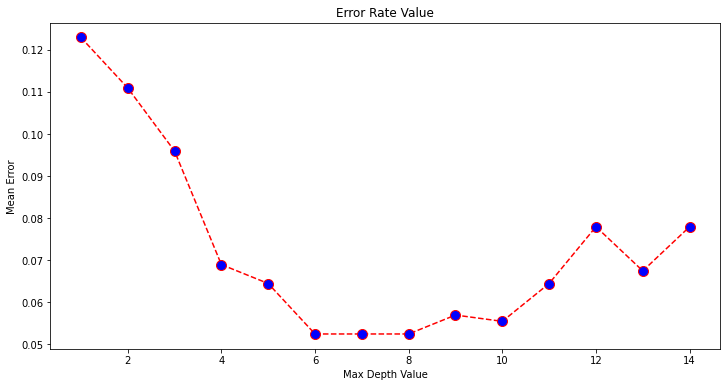

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Value')
plt.xlabel('Max Depth Value')
plt.ylabel('Mean Error')

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
Model_compare.append(('Decision Trees', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))

Accuracy: 0.9475262368815592
Precision: 0.8390804597701149
Recall: 0.776595744680851
F1 Score 0.8066298342541435


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       573
           1       0.84      0.78      0.81        94

    accuracy                           0.95       667
   macro avg       0.90      0.88      0.89       667
weighted avg       0.95      0.95      0.95       667



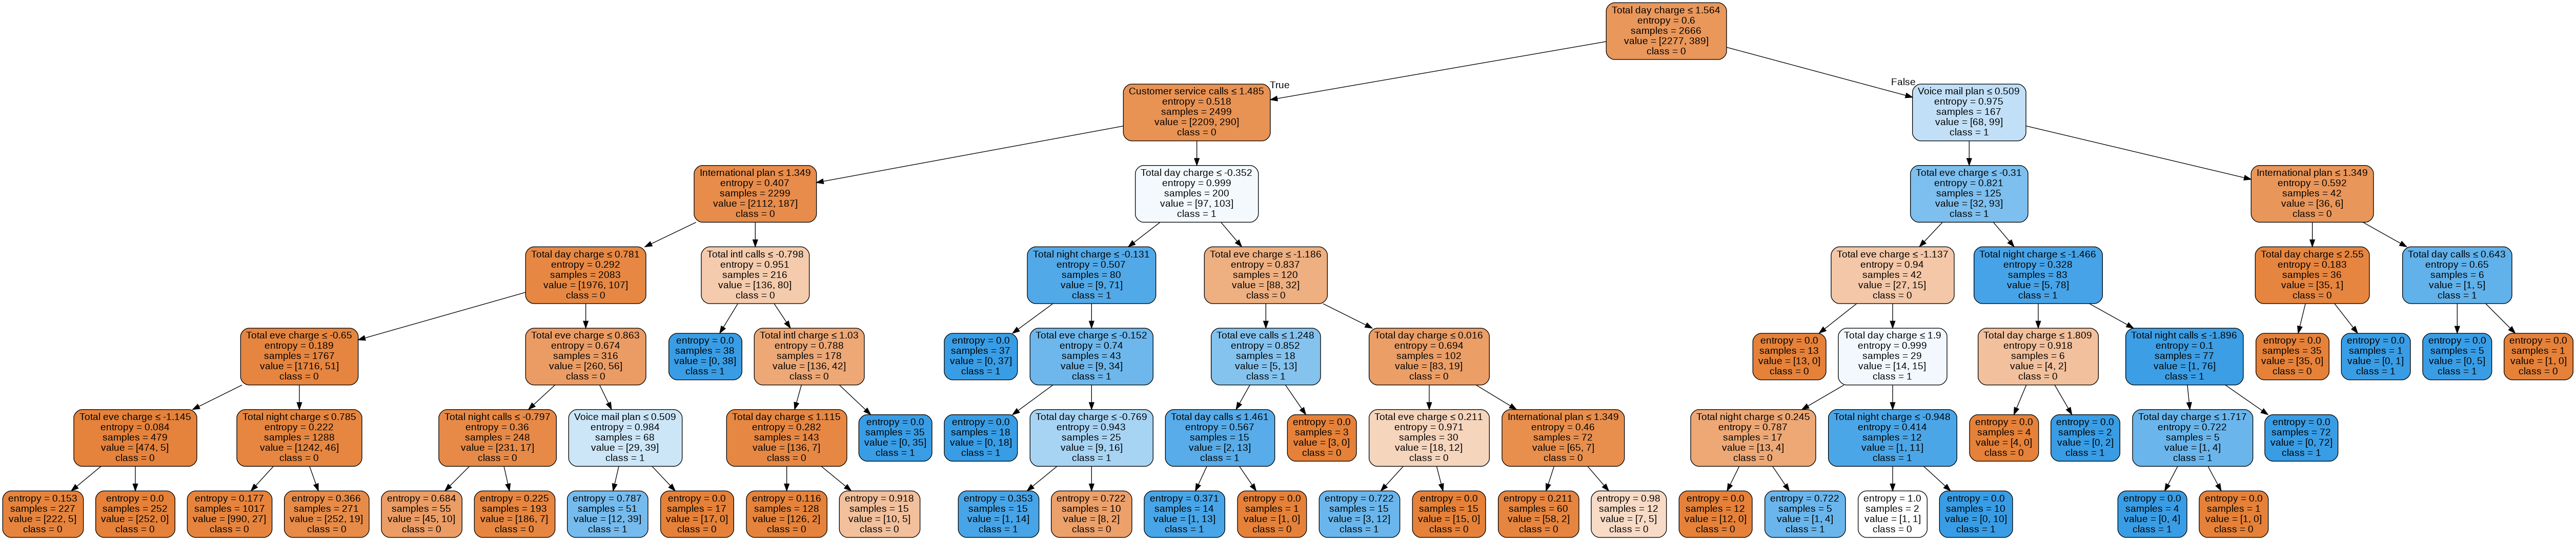

In [54]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = model_data.drop('Churn',axis=1).columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# **Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(random_state=1)

In [0]:
rf = rf.fit(X_train, y_train)

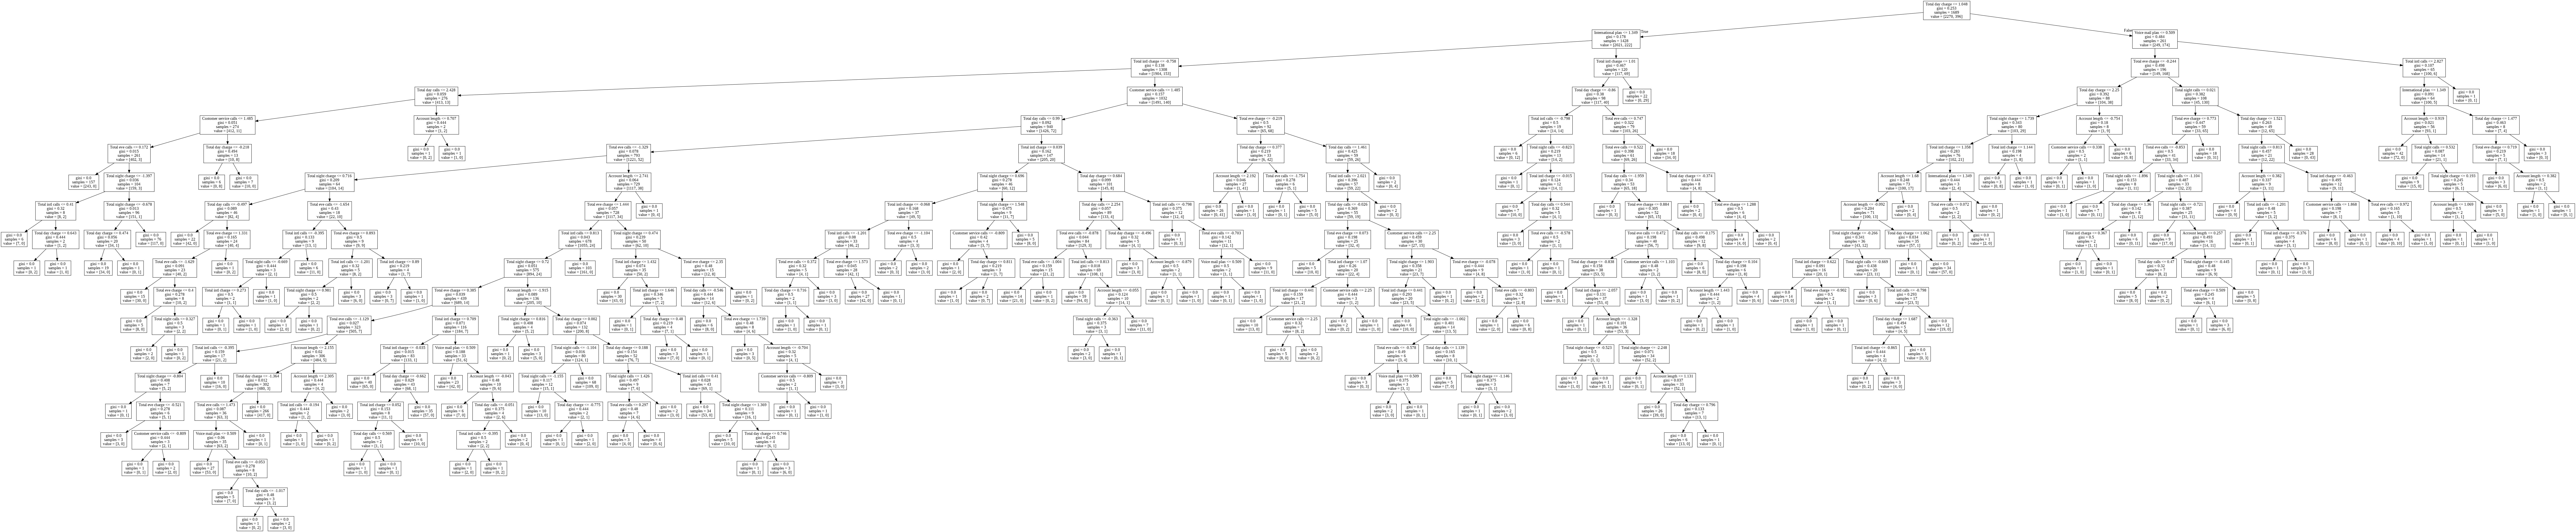

In [58]:
dt = rf.estimators_[0]
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=model_data.drop('Churn',axis=1).columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [0]:
y_pred = rf.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       573
           1       0.92      0.71      0.80        94

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



In [61]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9505247376311844


**Optimizing Hyperparameters for Random Forest**

In [62]:
import numpy as np
error = []
for i in range(1, 15):
    RandomForest_Model = RandomForestClassifier(max_depth=i)
    RandomForest_Model.fit(X_train, y_train)
    pred_i = RandomForest_Model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

print(error)

[0.1409295352323838, 0.1409295352323838, 0.13943028485757122, 0.1199400299850075, 0.08695652173913043, 0.06746626686656672, 0.05847076461769116, 0.05697151424287856, 0.05247376311844078, 0.049475262368815595, 0.044977511244377814, 0.043478260869565216, 0.049475262368815595, 0.044977511244377814]


Text(0, 0.5, 'Mean Error')

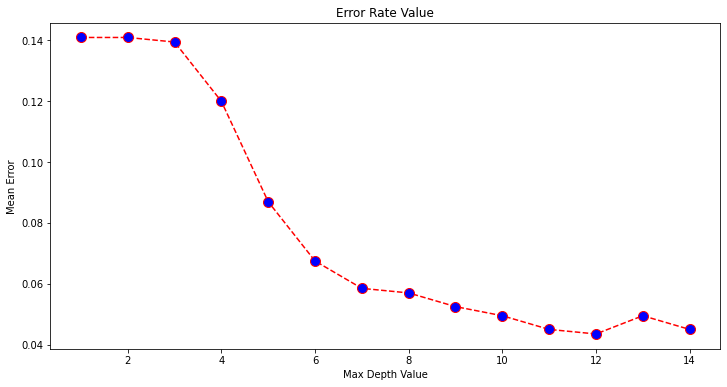

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Value')
plt.xlabel('Max Depth Value')
plt.ylabel('Mean Error')

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 8, 10, 12],
    'n_estimators': [100, 200, 300, 500, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
Random_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [65]:
Random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
rf = RandomForestClassifier(bootstrap=True,
                            ccp_alpha=0.0,
                            class_weight=None,
                            criterion='entropy',
                            max_depth=10,
                            max_features='auto',
                            max_leaf_nodes=None,
                            max_samples=None,
                            min_impurity_decrease=0.0,
                            min_impurity_split=None,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            n_estimators=100,
                            verbose=0,
                            warm_start=False)

In [0]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

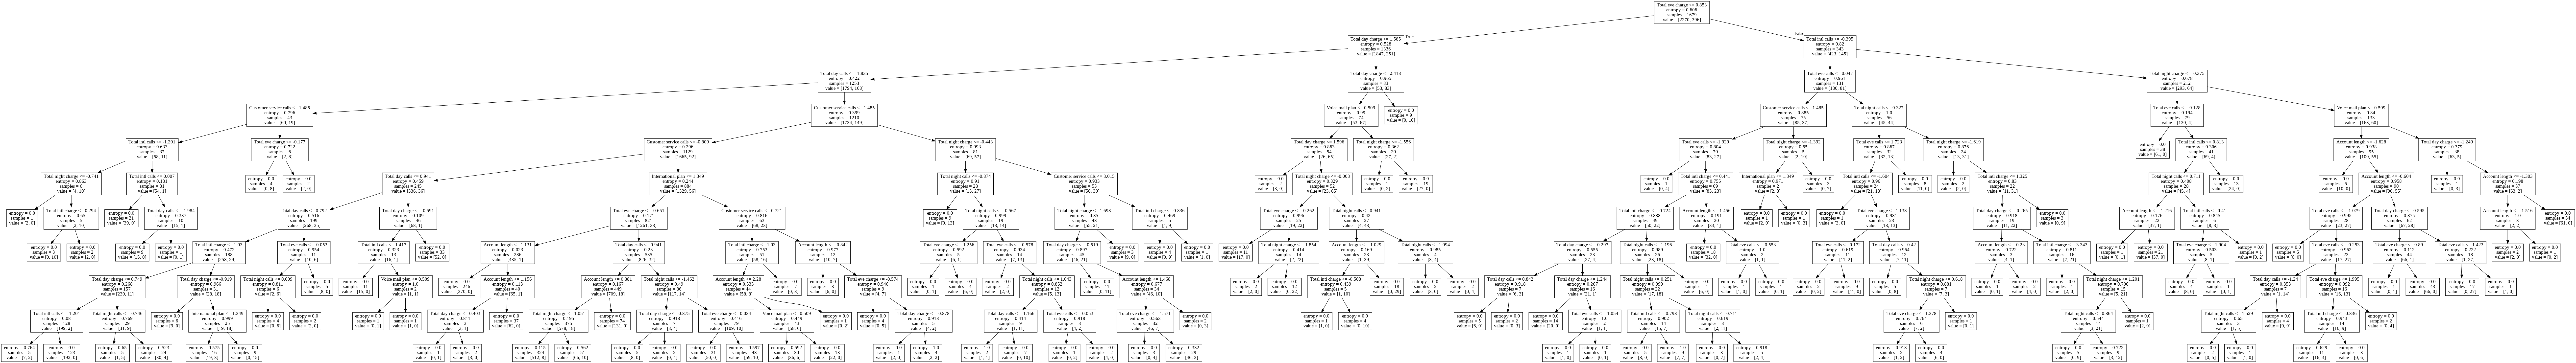

In [68]:
dt = rf.estimators_[0]
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=model_data.drop('Churn',axis=1).columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [69]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
Model_compare.append(('Random forest', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))

Accuracy: 0.9610194902548725
Precision: 0.9594594594594594
Recall: 0.7553191489361702
F1 Score 0.8452380952380952


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       573
           1       0.96      0.76      0.85        94

    accuracy                           0.96       667
   macro avg       0.96      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667



# **SVM**

In [71]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[564   9]
 [ 48  46]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       573
           1       0.84      0.49      0.62        94

    accuracy                           0.91       667
   macro avg       0.88      0.74      0.78       667
weighted avg       0.91      0.91      0.90       667



**Tuning Hyper Parameters**

In [74]:
error=[]
kernels=['sigmoid', 'rbf', 'linear', 'poly']
for k in kernels:
  svclassifier = SVC(kernel=k)
  svclassifier.fit(X_train, y_train)
  y_pred = svclassifier.predict(X_test)
  print(f"{k} Accuracy:", accuracy_score(y_test, y_pred))
  error.append(np.mean(y_pred != y_test))

sigmoid Accuracy: 0.8215892053973014
rbf Accuracy: 0.9145427286356822
linear Accuracy: 0.8590704647676162
poly Accuracy: 0.9205397301349325


In [75]:
error

[0.17841079460269865,
 0.08545727136431784,
 0.1409295352323838,
 0.07946026986506746]

In [76]:
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
Model_compare.append(('SVM', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))

Accuracy: 0.9205397301349325
Precision: 0.8867924528301887
Recall: 0.5
F1 Score 0.6394557823129252


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       573
           1       0.89      0.50      0.64        94

    accuracy                           0.92       667
   macro avg       0.91      0.74      0.80       667
weighted avg       0.92      0.92      0.91       667



# **Model Comparision**

In [78]:
 df = pd.DataFrame(Model_compare, columns=["Model","Accuracy","Precision","Recall","f1-score"])
 df

Model  Accuracy  Precision    Recall  f1-score
0  Logistic Regression  0.851574   0.432432  0.170213  0.244275
1                  KNN  0.913043   0.860000  0.457447  0.244275
2       Decision Trees  0.947526   0.839080  0.776596  0.806630
3        Random forest  0.961019   0.959459  0.755319  0.845238
4                  SVM  0.920540   0.886792  0.500000  0.639456

(0.85, 1.0)

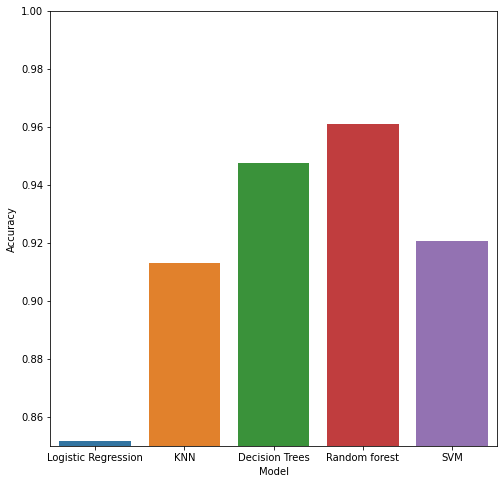

In [79]:
import seaborn as sns
plt.subplots(figsize=(8,8))
sns.barplot(x='Model', y='Accuracy', data=df)
plt.ylim(0.85, 1.0)

In [0]:
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier(criterion="entropy", max_depth=6)))
models.append(('Random Forest', RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=10)))
models.append(('SVM', SVC(kernel='poly')))
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))

In [82]:
seed=7
array = model_data.values
X = array[:,0:12]
Y = array[:,12]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.856267 (0.021176)
Decision Tree: 0.938494 (0.010923)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest: 0.947490 (0.009541)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.855063 (0.020892)
KNN: 0.855667 (0.016111)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


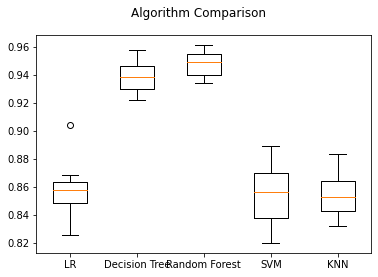

In [83]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()